# The minimizers of Moztkin polynomial

In [1]:
using DynamicPolynomials, MomentTools, Plots
using JuMP, MosekTools; optimizer = optimizer_with_attributes(Mosek.Optimizer, "QUIET" => true);

MathOptInterface.OptimizerWithAttributes(Mosek.Optimizer, Pair{MathOptInterface.AbstractOptimizerAttribute,Any}[MathOptInterface.RawParameter("QUIET") => true])

We use Mosek solver for the convex optimization on SDP matrices.

In [2]:
X  = @polyvar x y
motz = x^4*y^2 + x^2*y^4 - 3x^2*y^2  + 1 

x⁴y² + x²y⁴ - 3x²y² + 1

This polynomial, known as Motzkin polynomial, is non-negative but not a sum of squares.

We construction a moment relaxation of order 6, imposing the moments to come from a probability measure, with total mass equal to 1:

In [3]:
M = MOM.Model(X, 6, optimizer)
constraint_unitmass(M)
objective(M,motz)
v, M = optimize(M)

(-1.6742123696021906e-10, 
A Moment program with:
A JuMP Model
Minimization problem with:
Variables: 91
Objective function type: GenericAffExpr{Float64,VariableRef}
`GenericAffExpr{Float64,VariableRef}`-in-`MathOptInterface.EqualTo{Float64}`: 1 constraint
`Array{VariableRef,1}`-in-`MathOptInterface.PositiveSemidefiniteConeTriangle`: 1 constraint
Model mode: AUTOMATIC
CachingOptimizer state: ATTACHED_OPTIMIZER
Solver name: Dual model with Mosek attached
Names registered in the model: basis, degree, dual, index, moments, monomials, nu, variables, y)

In [4]:
v

-1.6742123696021906e-10

The objective value is a lower bound of the actual mimimal value $0$ of Motzkin polynomial.

We extract a measure from the sequence of moments, using the function `MultivariateSeries.decompose`:

In [5]:
w, Xi = get_measure(M)

(Complex{Float64}[2.422720520517551e-16 - 1.5758486166105024e-35im, 2.2236819056680887e-12 + 9.892011287626949e-36im, 1.7643161854723318e-12 - 2.6500523178708715e-34im, 9.885473615843977e-39 + 1.296345030368501e-44im, 2.5717060998422886e-38 + 6.460662041830728e-38im, 2.571664378781834e-38 - 6.460671108496429e-38im, -1.9002089333610084e-37 - 1.6668886035696862e-46im, 6.507568107461246e-37 - 4.1167975292624216e-45im, 1.764316185472704e-12 + 2.650052317908257e-34im, 2.223681905661797e-12 - 9.892011288262631e-36im, 2.422720520531953e-16 + 1.5758486166032883e-35im], Complex{Float64}[-58.46620397545505 + 0.0im -38.20165923663332 + 0.0im … 38.20165923663697 + 0.0im 58.46620397545542 + 0.0im; -16.17323437451834 + 0.0im 97.52369559351392 + 0.0im … -97.52369559352778 + 0.0im 16.17323437451484 + 0.0im])

 `w` is the vector of weights and `Xi` is the matrix of points, that is support of the measure $\mu=\sum_i \omega_i \delta_{\Xi_i}$. `w[i]` is the weight of the Dirac measure corresponding to the point `Xi[:,i]` in this decomposition.

We plot the points obtained in the decomposition, colored in red by the absolute value of the weight. The blue point are the actual minimizers.

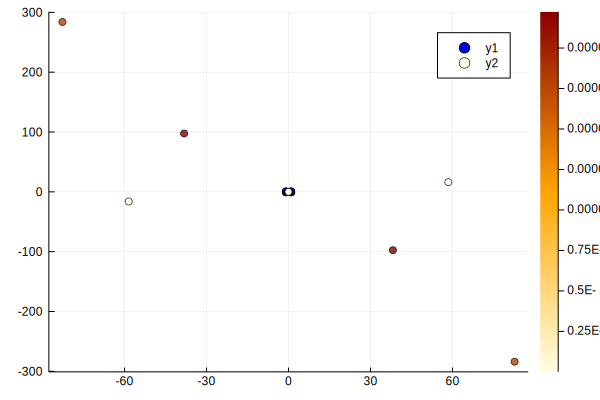

In [6]:
p0 = plot([-1,-1,1,1], [-1,1,-1,1], seriestype = :scatter, color=:blue)
p1 = plot!(p0,real(Xi[1,:]), real(Xi[2,:]), seriestype = :scatter, zcolor = abs.(w), m = (:heat, 0.8, Plots.stroke(1, :black)))

As we can see, the dark red points are quite far from the actual minimizers (in blue). 

Now, to find the minimizers, we add as constraints, that the gradient of the polynomial should vanish:

In [7]:
M = MOM.Model(X, 6, optimizer)
constraint_unitmass(M)
objective(M,motz)

J = differentiate(motz,X)
constraint_zero(M, J...)
v = optimize(M)[1]

3.6962168659115946e-8

In [8]:
w, Xi = get_measure(M)

([2.9820040940994937e-12, 8.40357178022938e-10, 0.25000039065413765, 0.24999957879207738, -5.633924733507435e-30, 8.20465204457801e-28, 0.24999957879207638, 0.2500003906541378, 8.403571780904284e-10, 2.98200409180814e-12], [-5.653382506936243 -0.02859140105189747 … 0.02859140104846533 5.653382506935368; -0.00729487532247358 -5.588463655943241 … 5.5884636559513545 0.007294875324514726])

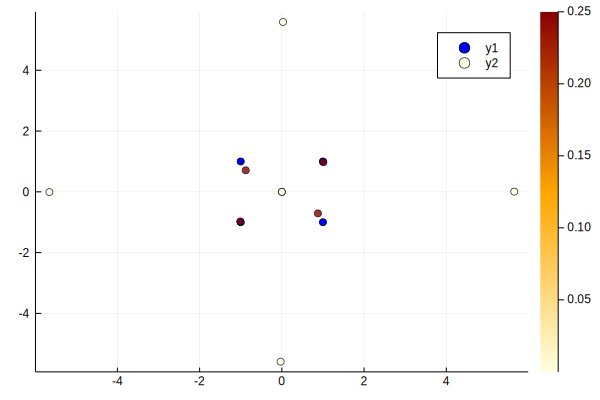

In [9]:
p0 = plot([-1,-1,1,1], [-1,1,-1,1], seriestype = :scatter, color=:blue)
p1 = plot!(p0,real(Xi[1,:]), real(Xi[2,:]), seriestype = :scatter, zcolor = abs.(w), m = (:heat, 0.8, Plots.stroke(1, :black)))

The result is better. We find approximately the $4$ minimizers and there are $5$ false minimizers, with almost zero weights.


Finally, to find the minimizers, we add the constraint that the polynomial should vanish, since its minimal value is $0$:

In [10]:
M = MOM.Model(X, 6, optimizer)
constraint_unitmass(M)
objective(M,motz)

constraint_zero(M, motz)

v = optimize(M)[1]

2.3258039938411912e-10

In [11]:
w, Xi = get_measure(M)

([0.25003988152199796, 0.24996000770125856, 3.9956400575919974e-30, 2.1385713537795788e-32, 0.2499600077012576, 0.25003988152199885], [-1.0042737319830506 -0.9868052796791599 … 0.9868052796791649 1.004273731983051; -0.9778850651924822 0.9311110004446935 … -0.9311110004447197 0.9778850651924834])

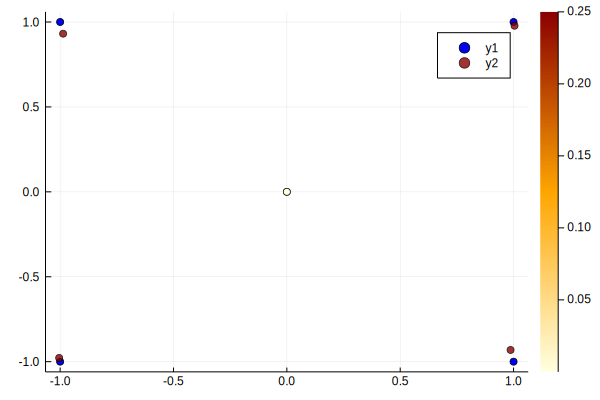

In [12]:
p0 = plot([-1,-1,1,1], [-1,1,-1,1], seriestype = :scatter, color=:blue)
p1 = plot!(p0,real(Xi[1,:]), real(Xi[2,:]), seriestype = :scatter, zcolor = abs.(w), m = (:heat, 0.8, Plots.stroke(1, :black)))

The minimizers (in red) are close to that actual minimizers (in blue) and there are two superposed false minimizers, with weights of the order less than $10^{-30}$.